In [ ]:
!pip install tensorflow matplotlib numpy scikit-learn seaborn

In [4]:
!pip install seaborn

     -------------------------------------- 294.9/294.9 kB 9.2 MB/s eta 0:00:00
     ---------------------------------------- 11.3/11.3 MB 5.7 MB/s eta 0:00:00
     -------------------------------------- 509.2/509.2 kB 8.0 MB/s eta 0:00:00
     -------------------------------------- 347.8/347.8 kB 7.2 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Implementing Feedforward neural networks with Keras and TensorFlow for
# classification of hand-written MNIST dataset using below steps:
# a. Import the necessary packages
# b. Load the training and testing data
# c. Define the network architecture using Keras
# d. Train the model using SGD with 11 epochs
# e. Evaluate the network
# f. Plot the training loss and accuracy

TensorFlow version: 2.20.0
Loading MNIST dataset...
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing data shape: (10000, 28, 28)
Testing labels shape: (10000,)


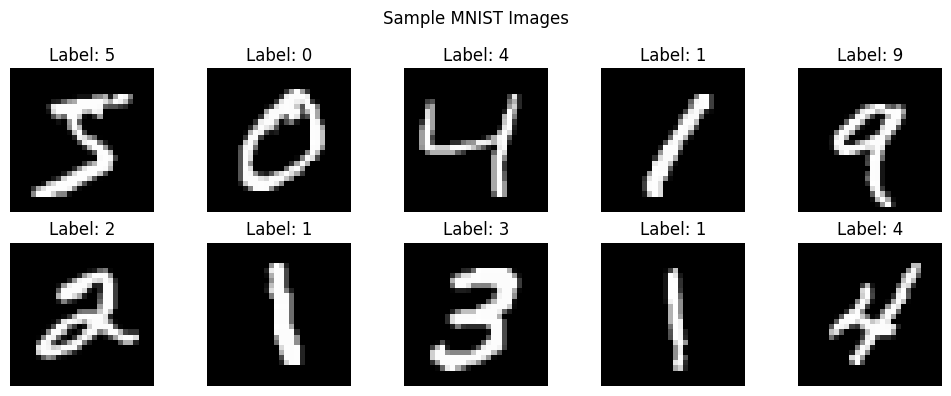

After flattening - Training data shape: (60000, 784)
One-hot encoded labels shape: (60000, 10)

MODEL ARCHITECTURE


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)


Model compiled with SGD optimizer

TRAINING THE MODEL
Epoch 1/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6189 - loss: 1.3413 - val_accuracy: 0.8548 - val_loss: 0.5336
Epoch 2/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8413 - loss: 0.5404 - val_accuracy: 0.8948 - val_loss: 0.3633
Epoch 3/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8743 - loss: 0.4252 - val_accuracy: 0.9114 - val_loss: 0.3073
Epoch 4/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8905 - loss: 0.3711 - val_accuracy: 0.9208 - val_loss: 0.2755
Epoch 5/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9039 - loss: 0.3316 - val_accuracy: 0.9274 - val_loss: 0.2494
Epoch 6/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9106 - loss: 0.3039 - val_accuracy: 0.9331 - val_loss: 0.2292
Epoch 7/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9175 - loss: 0.2798 - val_accuracy: 0.9375 - val_loss: 0.2130
Epoch 8/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/st

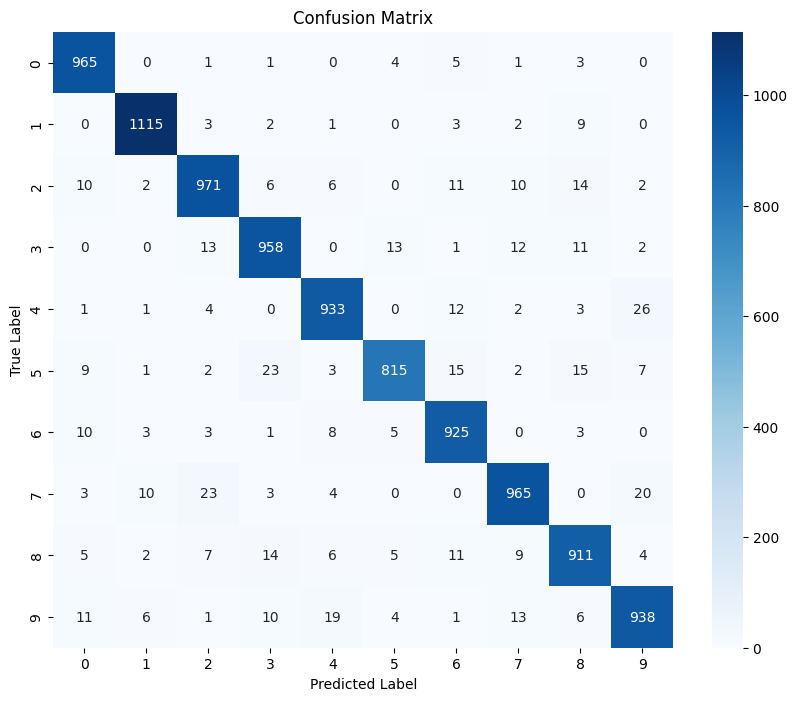

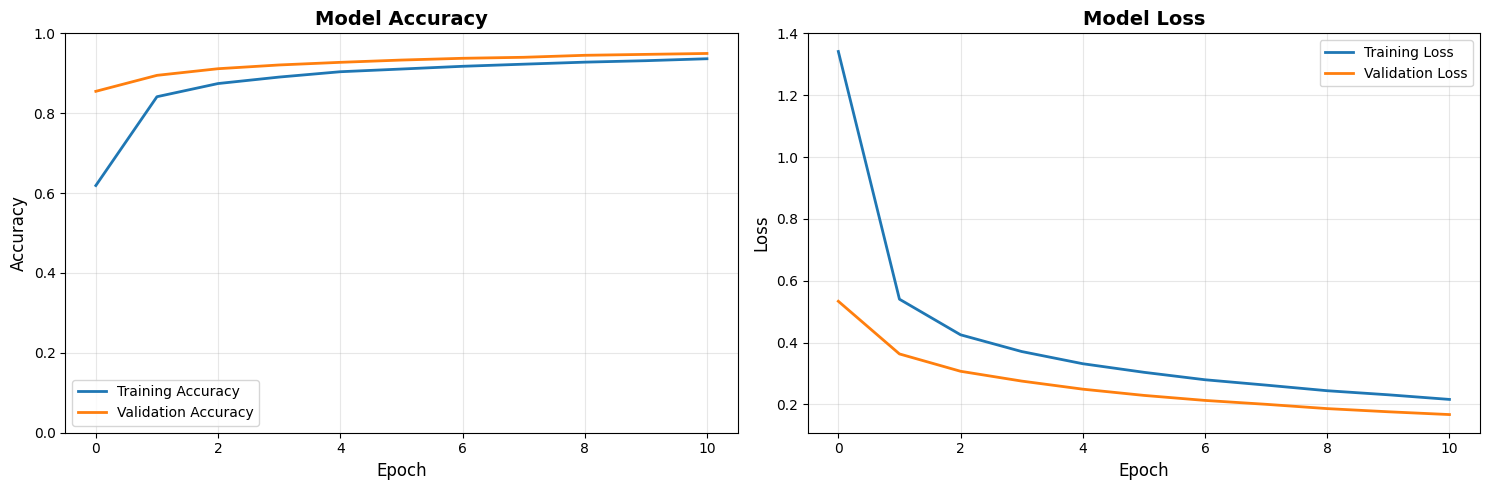


SAMPLE PREDICTIONS


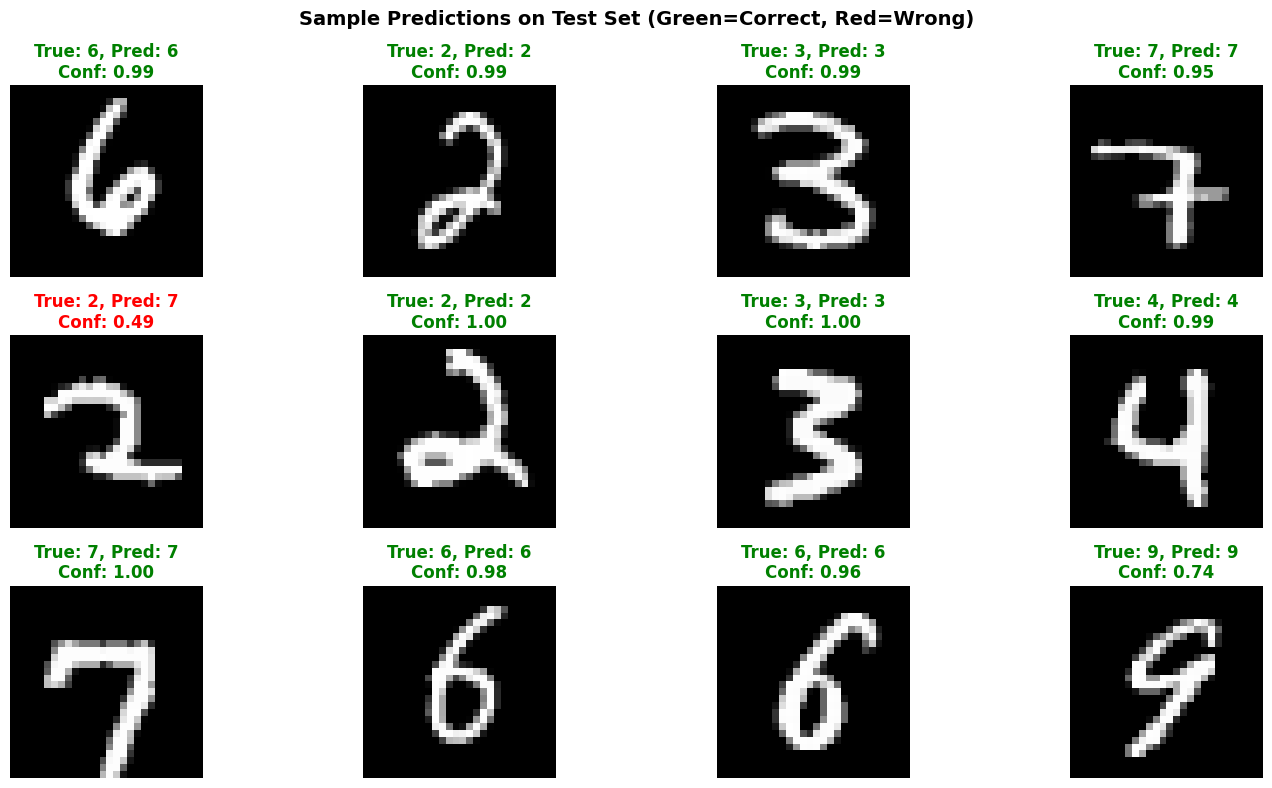


FINAL TRAINING SUMMARY
📊 Final Training Accuracy: 93.64%
📊 Final Validation Accuracy: 94.96%
📊 Final Test Accuracy: 94.96%
🔥 Total Parameters: 567,434


In [5]:
# ============================================================
# Implementing Feedforward Neural Network for MNIST Classification
# ============================================================

# a. Import the necessary packages
import tensorflow as tf
from tensorflow.keras import datasets, models, layers, utils
import matplotlib.pyplot as plt
import numpy as np

print(f"TensorFlow version: {tf.__version__}")

# For reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# b. Load the training and testing data
print("Loading MNIST dataset...")
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)

# Display sample images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Sample MNIST Images")
plt.tight_layout()
plt.show()

# Preprocess the data
# Normalize pixel values (0-255 -> 0-1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images (28x28 -> 784)
x_train_flat = x_train.reshape((x_train.shape[0], 28*28))
x_test_flat = x_test.reshape((x_test.shape[0], 28*28))

print(f"After flattening - Training data shape: {x_train_flat.shape}")

# One-hot encode the labels
y_train_cat = utils.to_categorical(y_train, 10)
y_test_cat = utils.to_categorical(y_test, 10)

print(f"One-hot encoded labels shape: {y_train_cat.shape}")

# c. Define the network architecture using Keras
model = models.Sequential([
    layers.Input(shape=(784,)),              # Input layer - flattened 28x28 images
    layers.Dense(512, activation='relu'),    # Hidden layer 1
    layers.Dropout(0.2),                     # Dropout for regularization
    layers.Dense(256, activation='relu'),    # Hidden layer 2
    layers.Dropout(0.2),                     # Dropout for regularization
    layers.Dense(128, activation='relu'),    # Hidden layer 3
    layers.Dense(10, activation='softmax')   # Output layer - 10 classes (0-9)
])

# Model summary
print("\n" + "="*50)
print("MODEL ARCHITECTURE")
print("="*50)
model.summary()

# Compile the model with SGD optimizer
model.compile(
    optimizer='sgd',  # Stochastic Gradient Descent
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\nModel compiled with SGD optimizer")

# d. Train the model using SGD with 11 epochs
print("\n" + "="*50)
print("TRAINING THE MODEL")
print("="*50)

history = model.fit(
    x_train_flat, y_train_cat,
    batch_size=128,
    epochs=11,  # 11 epochs as specified
    validation_data=(x_test_flat, y_test_cat),
    verbose=1
)

# e. Evaluate the network
print("\n" + "="*50)
print("EVALUATING THE NETWORK")
print("="*50)

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test_cat, verbose=0)

print(f"✅ Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"✅ Test Loss: {test_loss:.4f}")

# Make predictions on test set
predictions = model.predict(x_test_flat)
predicted_classes = np.argmax(predictions, axis=1)

# Calculate additional metrics
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print("\nClassification Report:")
print(classification_report(y_test, predicted_classes))

# Confusion Matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# f. Plot the training loss and accuracy
plt.figure(figsize=(15, 5))

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Model Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 1)

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Model Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional: Display some test predictions
print("\n" + "="*50)
print("SAMPLE PREDICTIONS")
print("="*50)

# Select random test samples
sample_indices = np.random.choice(len(x_test), 12, replace=False)

plt.figure(figsize=(15, 8))
for i, idx in enumerate(sample_indices):
    plt.subplot(3, 4, i+1)
    plt.imshow(x_test[idx], cmap='gray')
    
    true_label = y_test[idx]
    pred_label = predicted_classes[idx]
    confidence = np.max(predictions[idx])
    
    # Color code: green if correct, red if wrong
    color = 'green' if true_label == pred_label else 'red'
    plt.title(f'True: {true_label}, Pred: {pred_label}\nConf: {confidence:.2f}', 
              color=color, fontweight='bold')
    plt.axis('off')

plt.suptitle('Sample Predictions on Test Set (Green=Correct, Red=Wrong)', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Final Summary
print("\n" + "="*60)
print("FINAL TRAINING SUMMARY")
print("="*60)
print(f"📊 Final Training Accuracy: {history.history['accuracy'][-1]*100:.2f}%")
print(f"📊 Final Validation Accuracy: {history.history['val_accuracy'][-1]*100:.2f}%")
print(f"📊 Final Test Accuracy: {test_accuracy*100:.2f}%")
print(f"🔥 Total Parameters: {model.count_params():,}")
print("="*60)

Training data shape: (60000, 784)
Training labels shape: (60000, 10)
Test data shape: (10000, 784)
Test labels shape: (10000, 10)


C:\Users\Yoda ji\Favorites\timewaste\timewaste\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.5706 - loss: 1.4041 - val_accuracy: 0.8566 - val_loss: 0.5842
Epoch 2/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8091 - loss: 0.6288 - val_accuracy: 0.8966 - val_loss: 0.3806
Epoch 3/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8579 - loss: 0.4791 - val_accuracy: 0.9101 - val_loss: 0.3189
Epoch 4/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8784 - loss: 0.4142 - val_accuracy: 0.9179 - val_loss: 0.2820
Epoch 5/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8910 - loss: 0.3697 - val_accuracy: 0.9244 - val_loss: 0.2575
Epoch 6/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9006 - loss: 0.3371 - val_accuracy: 0.9309 - val_loss: 0.2369
Epoch 7/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9092 - loss: 0.3116 - val_accuracy: 0.9355 - val_loss: 0.2219
Epoch 8/11
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9135 - loss: 0.2918 - val_accu

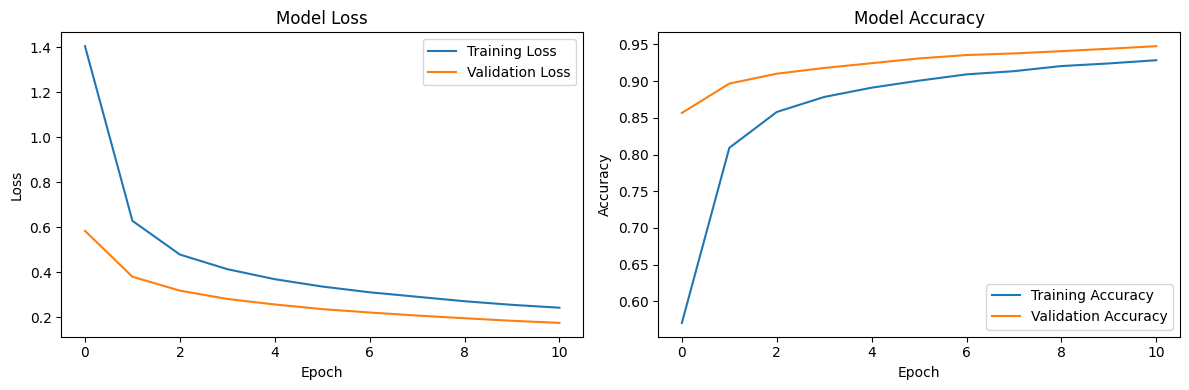

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


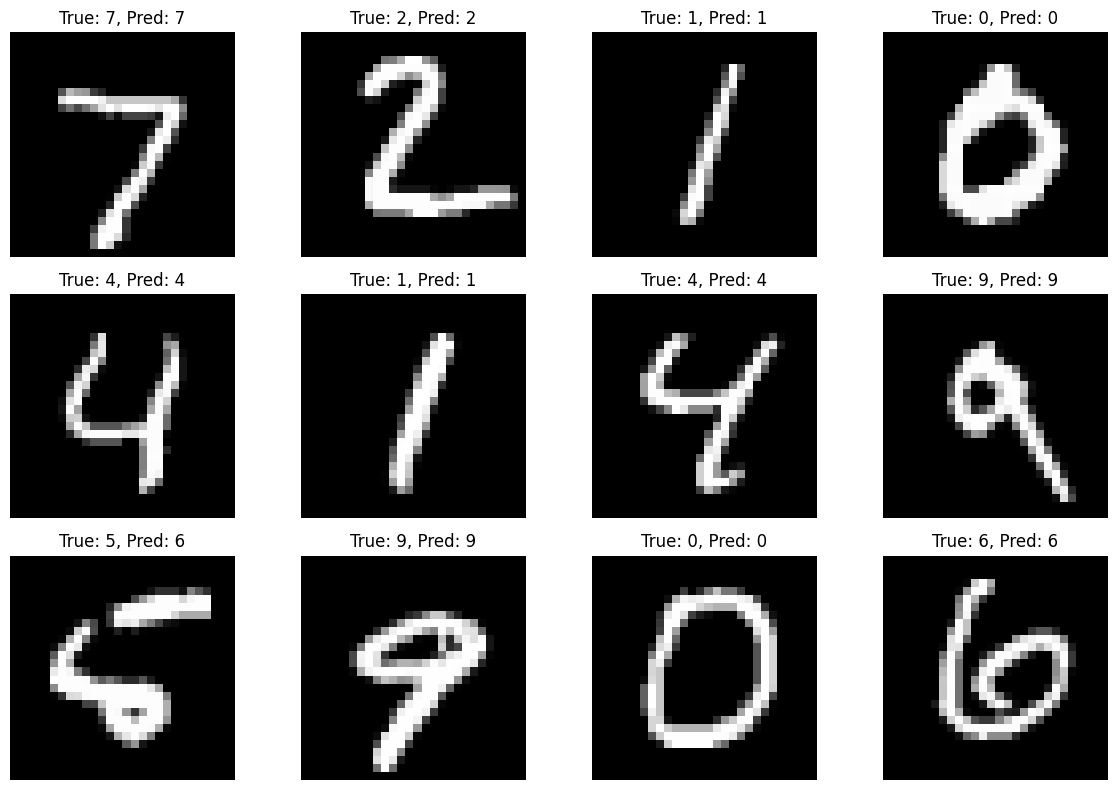

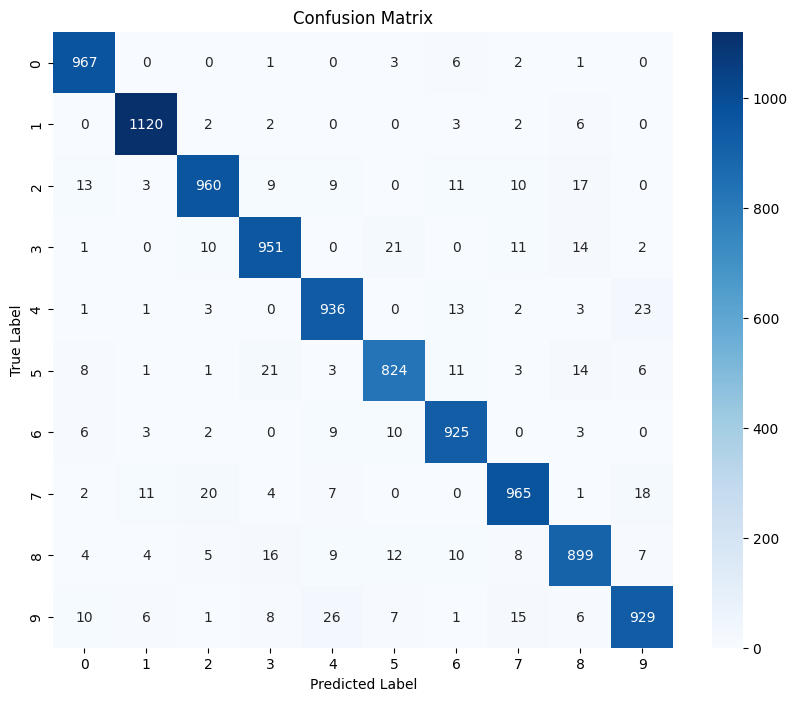


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.96      0.93      0.94      1032
           3       0.94      0.94      0.94      1010
           4       0.94      0.95      0.94       982
           5       0.94      0.92      0.93       892
           6       0.94      0.97      0.95       958
           7       0.95      0.94      0.94      1028
           8       0.93      0.92      0.93       974
           9       0.94      0.92      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



In [1]:
# a. Import the necessary packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# b. Load the training and testing data
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data from (28, 28) to (784,) for feedforward network
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# Convert labels to categorical one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

# c. Define the network architecture using Keras
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(784,)),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# Print model summary
model.summary()

# Compile the model
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# d. Train the model using SGD with 11 epochs
history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=11,
    validation_data=(x_test, y_test),
    verbose=1
)

# e. Evaluate the network
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# f. Plot the training loss and accuracy
plt.figure(figsize=(12, 4))

# Plot training & validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Additional: Make some predictions and display sample results
# Get predictions for test set
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Display some sample predictions
plt.figure(figsize=(12, 8))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    # Reshape back to 28x28 for display
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'True: {true_classes[i]}, Pred: {predicted_classes[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Print confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes))